In [68]:
import vaex
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [69]:
df_trips = vaex.open('data/trips/trips_prepared.hdf5')

# for testing with reduced lines
df_trips = df_trips.sample(n=100000, random_state=42)

In [70]:
df_trips.info()

column,type,unit,description,expression
Taxi ID_encoded,int64,,,
Company,str,,,
Company_encoded,int64,,,
ts_start,datetime64[us],,,
ts_end,datetime64[us],,,
start_day,datetime64[us],,,
start_weekday,int32,,,
start_month,int32,,,
Trip Seconds,float64,,,
Trip Miles,float64,,,


In [71]:
trip_attributes          = ['start_month', 'start_weekday', 'start_1_hour', 'Payment Type_encoded', 'Trip Seconds', 'Trip Miles', 'Trip Total']
trip_clustering_features = ['start_month', 'start_weekday_sin', 'start_weekday_cos', 'start_1_hour_sin', 'start_1_hour_cos', 'Payment Type_encoded', 'Trip Seconds', 'Trip Miles', 'Trip Total']

trip_clustering_df          = df_trips[trip_attributes].to_pandas_df()
trip_clustering_unscaled_df = df_trips[trip_clustering_features].to_pandas_df()

In [72]:
trip_clustering_df

,start_month,start_weekday,start_1_hour,Payment Type_encoded,Trip Seconds,Trip Miles,Trip Total
0,1,1,8,3,840.0,0.00,9.75
1,2,5,22,3,1108.0,5.00,15.25
2,11,4,23,3,600.0,2.30,10.65
3,3,6,11,3,0.0,0.00,3.25
4,3,4,22,3,360.0,0.50,7.55
...,...,...,...,...,...,...,...
99995,8,1,17,3,591.0,2.60,9.85
99996,3,2,18,3,360.0,0.12,6.05
99997,8,2,11,3,320.0,1.00,6.65
99998,1,3,11,3,627.0,3.00,9.65


In [73]:
trip_clustering_unscaled_df

,start_month,start_weekday_sin,start_weekday_cos,start_1_hour_sin,start_1_hour_cos,Payment Type_encoded,Trip Seconds,Trip Miles,Trip Total
0,1,0.781831,0.623490,0.866025,-5.000000e-01,3,840.0,0.00,9.75
1,2,-0.974928,-0.222521,-0.500000,8.660254e-01,3,1108.0,5.00,15.25
2,11,-0.433884,-0.900969,-0.258819,9.659258e-01,3,600.0,2.30,10.65
3,3,-0.781831,0.623490,0.258819,-9.659258e-01,3,0.0,0.00,3.25
4,3,-0.433884,-0.900969,-0.500000,8.660254e-01,3,360.0,0.50,7.55
...,...,...,...,...,...,...,...,...,...
99995,8,0.781831,0.623490,-0.965926,-2.588190e-01,3,591.0,2.60,9.85
99996,3,0.974928,-0.222521,-1.000000,-1.836970e-16,3,360.0,0.12,6.05
99997,8,0.974928,-0.222521,0.258819,-9.659258e-01,3,320.0,1.00,6.65
99998,1,0.433884,-0.900969,0.258819,-9.659258e-01,3,627.0,3.00,9.65


Check for missing values

In [74]:
trip_clustering_unscaled_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   start_month           100000 non-null  int32  
 1   start_weekday_sin     100000 non-null  float64
 2   start_weekday_cos     100000 non-null  float64
 3   start_1_hour_sin      100000 non-null  float64
 4   start_1_hour_cos      100000 non-null  float64
 5   Payment Type_encoded  100000 non-null  int64  
 6   Trip Seconds          99569 non-null   float64
 7   Trip Miles            100000 non-null  float64
 8   Trip Total            99999 non-null   float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 6.5 MB


`Trip Seconds` has missing values. Prpeare data and fill these values with 0

In [75]:
trip_clustering_unscaled_df.fillna(0, inplace=True)

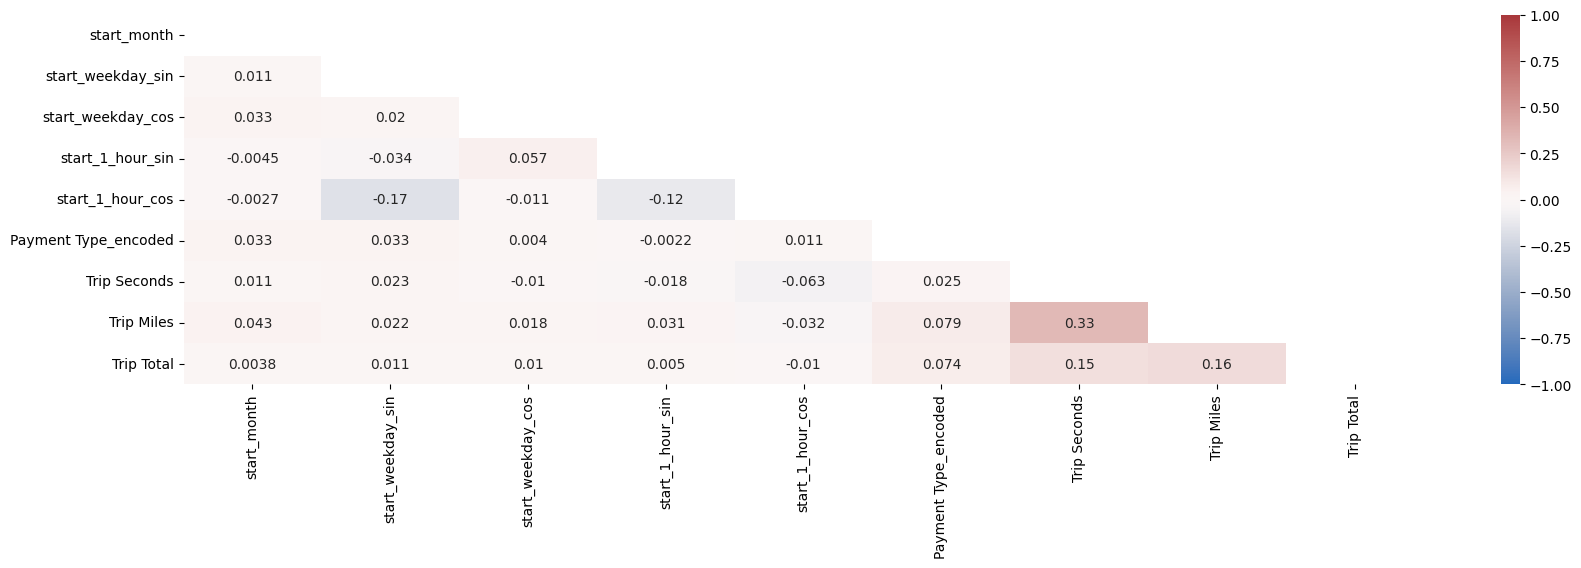

In [76]:
base_df_corr = trip_clustering_unscaled_df.corr()
mask = np.triu(np.ones_like(base_df_corr, dtype=bool))
f = plt.figure()
f.set_figwidth(20)
f.set_figwidth(20)
sns.heatmap(base_df_corr, annot = True, vmax= 1, vmin= -1, center=0, cmap='vlag', mask = mask)
plt.show()

In [77]:
# scaling trip_df with the go-to scaling in industry
scaler = StandardScaler()
scaler.fit(trip_clustering_unscaled_df)
trip_clustering_scaled = scaler.transform(trip_clustering_unscaled_df)

trip_clustering_scaled_df = pd.DataFrame(trip_clustering_unscaled_df, columns = trip_clustering_unscaled_df.columns, index = trip_clustering_unscaled_df.index)

In [78]:
trip_clustering_scaled_df

,start_month,start_weekday_sin,start_weekday_cos,start_1_hour_sin,start_1_hour_cos,Payment Type_encoded,Trip Seconds,Trip Miles,Trip Total
0,1,0.781831,0.623490,0.866025,-5.000000e-01,3,840.0,0.00,9.75
1,2,-0.974928,-0.222521,-0.500000,8.660254e-01,3,1108.0,5.00,15.25
2,11,-0.433884,-0.900969,-0.258819,9.659258e-01,3,600.0,2.30,10.65
3,3,-0.781831,0.623490,0.258819,-9.659258e-01,3,0.0,0.00,3.25
4,3,-0.433884,-0.900969,-0.500000,8.660254e-01,3,360.0,0.50,7.55
...,...,...,...,...,...,...,...,...,...
99995,8,0.781831,0.623490,-0.965926,-2.588190e-01,3,591.0,2.60,9.85
99996,3,0.974928,-0.222521,-1.000000,-1.836970e-16,3,360.0,0.12,6.05
99997,8,0.974928,-0.222521,0.258819,-9.659258e-01,3,320.0,1.00,6.65
99998,1,0.433884,-0.900969,0.258819,-9.659258e-01,3,627.0,3.00,9.65


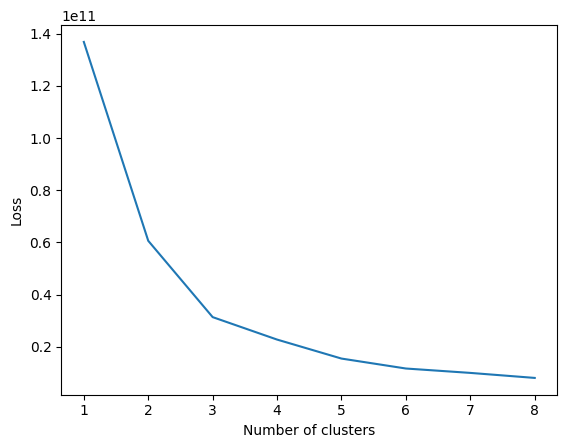

In [79]:
# Grid search for the optimum number of clusters with KMean  
# Source: Data Mining for Business Analytics by Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel: Chapter 15.10

k_max = 8

clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters = k + 1, n_init='auto', init="k-means++", random_state=42)
    model.fit(trip_clustering_scaled_df)
    
    clusters.append(k+1)
    losses.append(model.inertia_)
    
# plot grid search result
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

In [89]:
trip_model_k_means = KMeans(n_clusters = 5, n_init=10, init="k-means++", random_state=42)
trip_model_k_means.fit(trip_clustering_scaled_df)

trip_clustering_df['cluster_k_means'] = trip_model_k_means.predict(trip_clustering_scaled_df)

In [90]:
trip_clustering_df

,start_month,start_weekday,start_1_hour,Payment Type_encoded,Trip Seconds,Trip Miles,Trip Total,cluster_k_means
0,1,1,8,3,840.0,0.00,9.75,0
1,2,5,22,3,1108.0,5.00,15.25,0
2,11,4,23,3,600.0,2.30,10.65,2
3,3,6,11,3,0.0,0.00,3.25,2
4,3,4,22,3,360.0,0.50,7.55,2
...,...,...,...,...,...,...,...,...
99995,8,1,17,3,591.0,2.60,9.85,2
99996,3,2,18,3,360.0,0.12,6.05,2
99997,8,2,11,3,320.0,1.00,6.65,2
99998,1,3,11,3,627.0,3.00,9.65,2


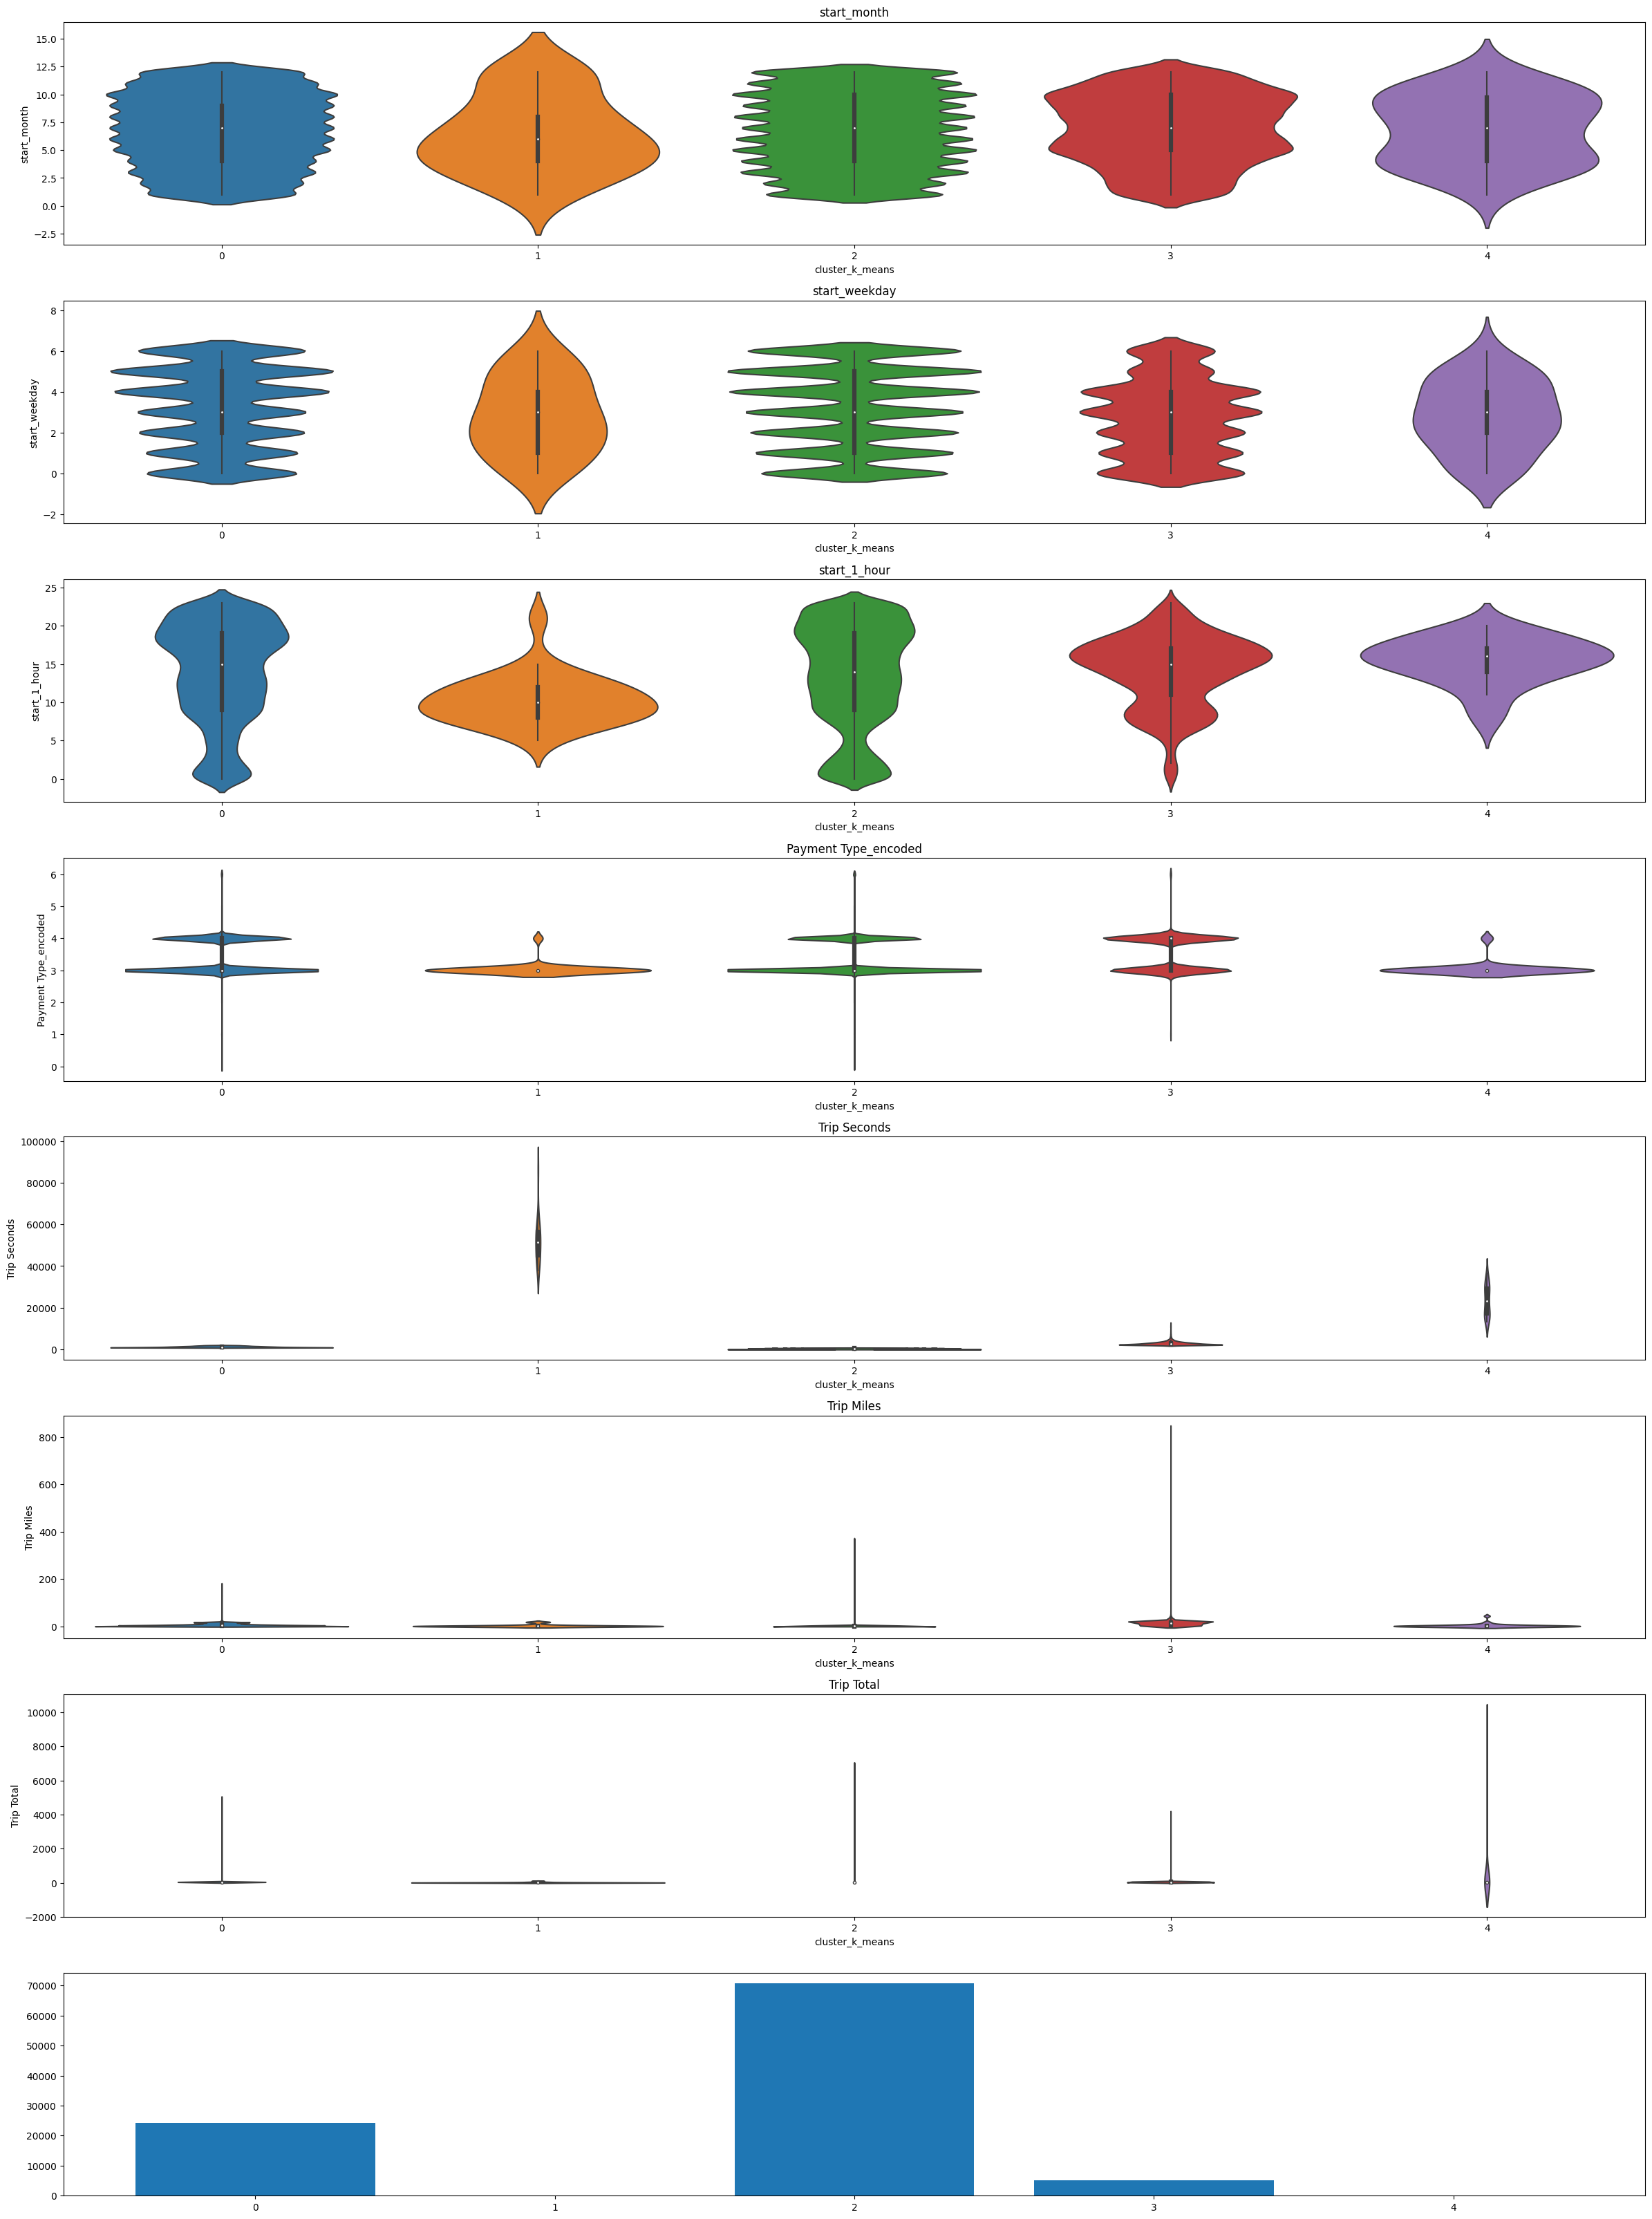

In [91]:
fig = plt.figure(figsize = (24,36))

plot_counter = 1

# iterate over all input features to plot the value distribution across the clusters  
for feat in trip_attributes:
        ax = fig.add_subplot(len(trip_clustering_df.columns) + 1, 1, plot_counter)

        sns.violinplot(ax = ax, x=trip_clustering_df['cluster_k_means'], y=trip_clustering_df[feat], data=trip_clustering_df)
        ax.set_title(feat)

        plot_counter += 1
# add cluster size to the plot
cluster_size = trip_clustering_df.groupby('cluster_k_means').size()
ax = fig.add_subplot(len(trip_clustering_df.columns) + 1, 1, plot_counter)
ax.bar(cluster_size.index, cluster_size)

fig.tight_layout()
plt.show() 